<a href="https://colab.research.google.com/github/Pinlinzz/Analisis-Dataset-Employee-Salary-Analysis-/blob/main/Analisis_Dataset_Employee_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INISIASI DAN IMPORTING DATASET


In [1]:
salary_df <- read.csv('/content/dataset/Salary_Dataset.csv')

summary(salary_df)

  Employee_ID         Name                Age           Gender         
 Min.   :   1.0   Length:1200        Min.   :20.00   Length:1200       
 1st Qu.: 300.8   Class :character   1st Qu.:30.00   Class :character  
 Median : 600.5   Mode  :character   Median :41.00   Mode  :character  
 Mean   : 600.5                      Mean   :39.99                     
 3rd Qu.: 900.2                      3rd Qu.:50.00                     
 Max.   :1200.0                      Max.   :59.00                     
   Country              City            Education          Job_Title        
 Length:1200        Length:1200        Length:1200        Length:1200       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

In [2]:
salary_df <- read.csv('/content/dataset/Salary_Dataset.csv')

# Instal library yang bakal dipakai
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(dplyr)) install.packages("dplyr")
if(!require(ggcorrplot)) install.packages("ggcorrplot")
if(!require(moments)) install.packages("moments")
if(!require(car)) install.packages("car")

# Load library
library(ggplot2)
library(dplyr)
library(ggcorrplot)
library(moments)
library(car)


# Data Cleaning Singkat (pastiin tipe data uda benar)
salary_df$Gender <- as.factor(salary_df$Gender)
salary_df$Education <- factor(salary_df$Education, levels = c("High School", "Bachelor", "Master", "PhD"))
salary_df$Country <- as.factor(salary_df$Country)
salary_df$Department <- as.factor(salary_df$Department)

# Cek struktur data
str(salary_df)

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggcorrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggcorrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Loading required package: moments

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘moments’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	1200 obs. of  17 variables:
 $ Employee_ID        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name               : chr  "Employee_1" "Employee_2" "Employee_3" "Employee_4" ...
 $ Age                : int  58 48 34 27 40 58 38 42 30 30 ...
 $ Gender             : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 1 2 1 1 2 ...
 $ Country            : Factor w/ 5 levels "Canada","India",..: 2 4 5 4 1 2 4 5 4 3 ...
 $ City               : chr  "NY" "NY" "London" "Karachi" ...
 $ Education          : Factor w/ 4 levels "High School",..: 2 1 1 2 3 4 4 1 3 2 ...
 $ Job_Title          : chr  "Manager" "Designer" "Manager" "Developer" ...
 $ Department         : Factor w/ 4 levels "Finance","HR",..: 3 2 3 4 3 4 3 2 3 2 ...
 $ Experience_Years   : int  0 4 1 19 2 18 17 28 21 17 ...
 $ Salary_USD         : int  130735 54363 76694 31582 109910 96844 51301 104329 31620 92224 ...
 $ Bonus_USD          : int  3650 14600 15317 19768 18193 16563 7895 18543 2531 6481 ...
 $ Work_Hours_Per_Week: int  41

## Central Tendencies (Mean, Median, Mode)

Tendensi sentral adalah statistik deskriptif yang menggambarkan 'pusat' dari suatu set data. Ini memberikan gambaran tentang nilai tipikal atau rata-rata dalam distribusi data:

*   **Mean (Rata-rata)**: Jumlah semua nilai dibagi dengan jumlah observasi. Sensitif terhadap outlier.
*   **Median (Nilai Tengah)**: Nilai tengah dalam set data yang diurutkan. Tidak sensitif terhadap outlier.
*   **Mode (Nilai Paling Sering Muncul)**: Nilai yang paling sering muncul dalam set data. Berguna untuk data kategorikal atau diskrit.

Berikut adalah perhitungan untuk beberapa kolom numerik penting:

In [21]:
# Fungsi untuk menghitung mode (sudah didefinisikan sebelumnya, tapi didefinisikan ulang untuk kejelasan)
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Kolom numerik yang ingin dianalisis tendensi sentralnya
numerical_cols <- c("Salary_USD", "Age", "Experience_Years", "Bonus_USD", "Work_Hours_Per_Week", "Performance_Score")

cat("=== Analisis Tendensi Sentral ===\n\n")

for (col in numerical_cols) {
  cat(paste0("--- Kolom: ", col, " ---\n"))
  cat(paste0("  Mean  : ", round(mean(salary_df[[col]], na.rm = TRUE), 2), "\n"))
  cat(paste0("  Median: ", round(median(salary_df[[col]], na.rm = TRUE), 2), "\n"))
  cat(paste0("  Mode  : ", round(get_mode(salary_df[[col]]), 2), "\n"))
  cat("\n")
}

=== Analisis Tendensi Sentral ===

--- Kolom: Salary_USD ---
  Mean  : 89792.31
  Median: 89086
  Mode  : 66901

--- Kolom: Age ---
  Mean  : 39.99
  Median: 41
  Mode  : 45

--- Kolom: Experience_Years ---
  Mean  : 14.35
  Median: 15
  Mode  : 12

--- Kolom: Bonus_USD ---
  Mean  : 10414.78
  Median: 10717.5
  Mode  : 16184

--- Kolom: Work_Hours_Per_Week ---
  Mean  : 44.36
  Median: 45
  Mode  : 58

--- Kolom: Performance_Score ---
  Mean  : 4.96
  Median: 5
  Mode  : 6



## Uji Normalitas Data (Shapiro-Wilk Test)

Uji normalitas digunakan untuk menentukan apakah sampel data berasal dari populasi yang berdistribusi normal. Ini penting karena banyak uji statistik inferensial (seperti t-test atau ANOVA) mengasumsikan normalitas data. Jika p-value dari uji Shapiro-Wilk kurang dari 0.05, kita menolak hipotesis nol (H0) bahwa data berdistribusi normal, yang berarti data kita tidak normal.

In [22]:
# --- Normality Test (Shapiro-Wilk Test) ---

# Shapiro-Wilk test sensitif terhadap ukuran sampel. Untuk sampel yang sangat besar,
# bahkan sedikit penyimpangan dari normalitas dapat menghasilkan p-value yang signifikan.
# Jika data terlalu besar (misal > 5000), kita bisa ambil sampel acak.

# Fungsi untuk melakukan Shapiro-Wilk test, dengan sampling jika diperlukan
do_shapiro_test <- function(data_vec, col_name, sample_size = 5000) {
  # Pastikan kolom yang diuji tidak mengandung nilai NA
  data_vec <- na.omit(data_vec)

  if (length(data_vec) > sample_size) {
    cat(paste0("\n--- Peringatan: Kolom '", col_name, "' memiliki lebih dari ", sample_size, " observasi. Mengambil sampel acak ", sample_size, " data untuk Shapiro-Wilk Test. ---\n"))
    sampled_data <- sample(data_vec, sample_size)
    test_result <- shapiro.test(sampled_data)
  } else {
    test_result <- shapiro.test(data_vec)
  }
  cat(paste0("Shapiro-Wilk Test untuk '", col_name, "':\n"))
  print(test_result)
  if (test_result$p.value < 0.05) {
    cat(paste0("  Kesimpulan: Data '", col_name, "' **TIDAK** berdistribusi normal (p < 0.05).\n"))
  } else {
    cat(paste0("  Kesimpulan: Data '", col_name, "' berdistribusi normal (p >= 0.05).\n"))
  }
}

# Uji normalitas untuk 'Salary_USD'
do_shapiro_test(salary_df$Salary_USD, "Salary_USD")

# Uji normalitas untuk 'Experience_Years'
do_shapiro_test(salary_df$Experience_Years, "Experience_Years")

Shapiro-Wilk Test untuk 'Salary_USD':

	Shapiro-Wilk normality test

data:  data_vec
W = 0.94903, p-value < 2.2e-16

  Kesimpulan: Data 'Salary_USD' **TIDAK** berdistribusi normal (p < 0.05).
Shapiro-Wilk Test untuk 'Experience_Years':

	Shapiro-Wilk normality test

data:  data_vec
W = 0.94901, p-value < 2.2e-16

  Kesimpulan: Data 'Experience_Years' **TIDAK** berdistribusi normal (p < 0.05).


## Visualisasi Normalitas Data (Q-Q Plot)

Selain uji statistik seperti Shapiro-Wilk, visualisasi adalah cara yang baik untuk memeriksa normalitas data. **Q-Q Plot (Quantile-Quantile Plot)** membandingkan kuantil data Anda dengan kuantil dari distribusi normal. Jika titik-titik data terletak mendekati garis lurus 45 derajat, maka data dianggap berdistribusi normal.

Berikut adalah Q-Q Plot untuk 'Salary_USD' dan 'Experience_Years':

[1] 1034  682

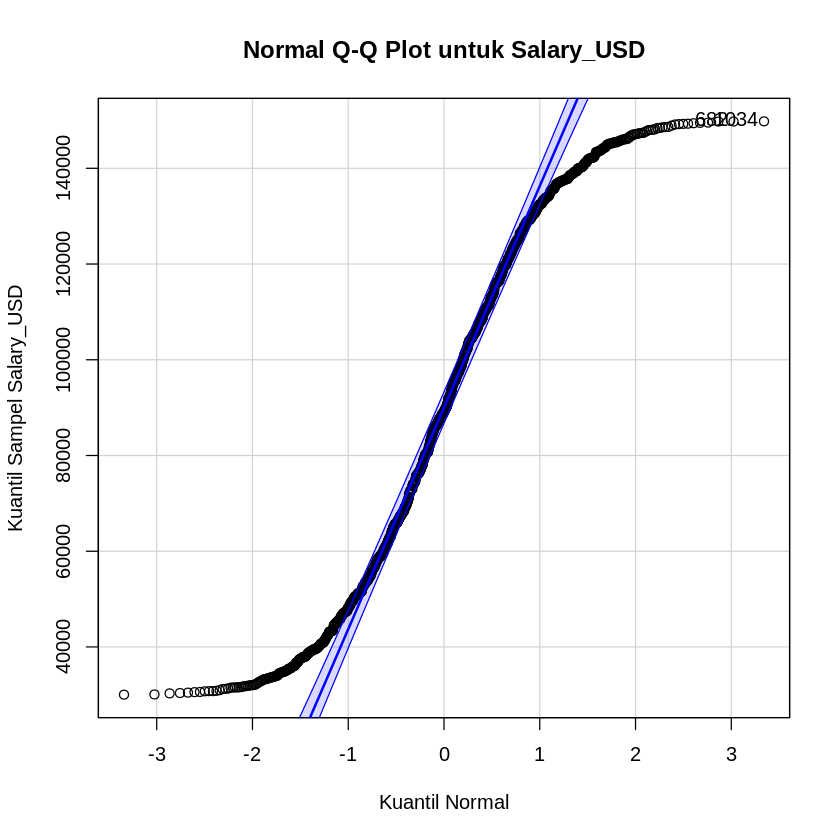

[1] 12 16

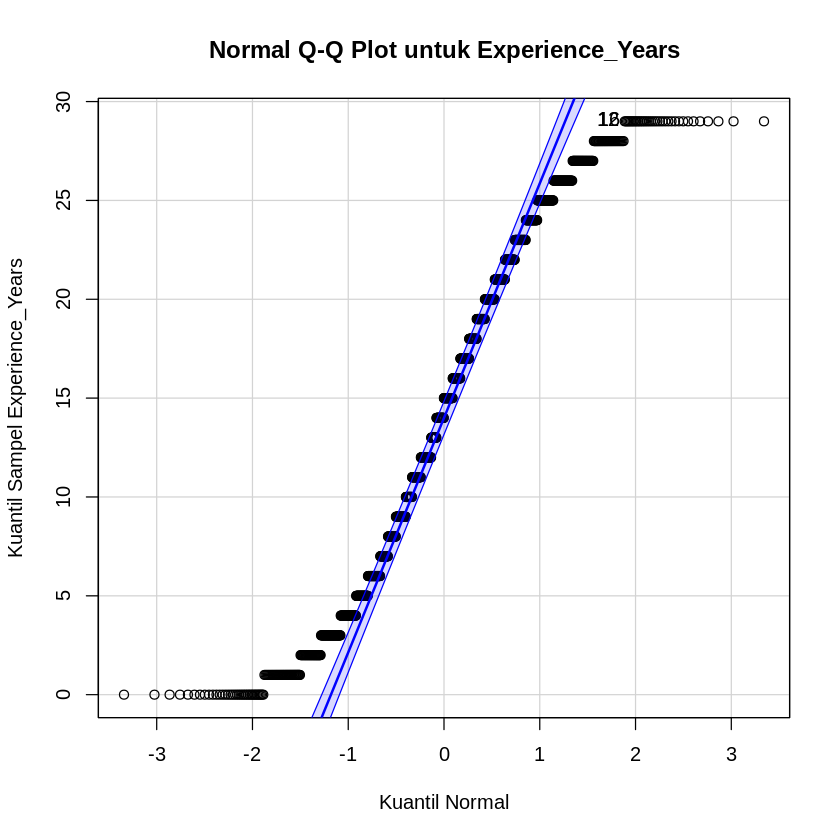

In [39]:
# Load library yang dibutuhkan untuk Q-Q plot
if(!require(car)) install.packages("car")
library(car)

# Fungsi untuk membuat Q-Q plot
create_qq_plot <- function(data_vec, col_name) {
  # Pastikan kolom yang diuji tidak mengandung nilai NA
  data_vec <- na.omit(data_vec)

  qqPlot(data_vec,
         main = paste0("Normal Q-Q Plot untuk ", col_name),
         ylab = paste0("Kuantil Sampel ", col_name),
         xlab = "Kuantil Normal")
}

# Membuat Q-Q plot untuk 'Salary_USD'
create_qq_plot(salary_df$Salary_USD, "Salary_USD")

# Membuat Q-Q plot untuk 'Experience_Years'
create_qq_plot(salary_df$Experience_Years, "Experience_Years")

## Data Cleaning & Preprocessing


In [3]:
# --- 1. Data Cleaning & Preprocessing ---

# buat hitung Modus (nilai yang paling sering muncul)
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Mengecek jumlah missing value sebelum cleaning
cat("Missing values before cleaning:\n")
print(colSums(is.na(salary_df)))

# Loop untuk membersihkan data
# Jika kolom numerik -> isi pakai Median
# Jika kolom kategori -> isi pakai Modus
for (col_name in names(salary_df)) {
  if (any(is.na(salary_df[[col_name]]))) {
    if (is.numeric(salary_df[[col_name]])) {
      median_val <- median(salary_df[[col_name]], na.rm = TRUE)
      salary_df[[col_name]][is.na(salary_df[[col_name]])] <- median_val
    } else {
      mode_val <- get_mode(salary_df[[col_name]][!is.na(salary_df[[col_name]])])
      salary_df[[col_name]][is.na(salary_df[[col_name]])] <- mode_val
    }
  }
}

cat("\nData cleaning complete. Missing values after cleaning:\n")
print(colSums(is.na(salary_df)))

Missing values before cleaning:
        Employee_ID                Name                 Age              Gender 
                  0                   0                   0                   0 
            Country                City           Education           Job_Title 
                  0                   0                   0                   0 
         Department    Experience_Years          Salary_USD           Bonus_USD 
                  0                   0                   0                   0 
Work_Hours_Per_Week         Remote_Work   Performance_Score        Joining_Year 
                  0                   0                   0                   0 
      Contract_Type 
                  0 

Data cleaning complete. Missing values after cleaning:
        Employee_ID                Name                 Age              Gender 
                  0                   0                   0                   0 
            Country                City           Education 

# Data Explanatory ~ Matrix Correlation


In [5]:
# --- 2. Exploratory Data Analysis ---

# Daftar kolom kategori yang bakal dianalisis
categorical_cols <- c('Gender', 'Country', 'City', 'Education', 'Job_Title', 'Department', 'Remote_Work', 'Contract_Type')

# Loop untuk nampilin value counts
for (col in categorical_cols) {
  cat(paste0("\nValue counts for ", col, ":\n"))

  # Membuat tabel frekuensi dan mengurutkannya dari yang terbanyak (descending)
  counts <- sort(table(salary_df[[col]]), decreasing = TRUE)

  # Menampilkan hasil
  print(counts)
}

# --- Correlation Matrix ---

# Mengambil hanya kolom numerik
numeric_cols <- sapply(salary_df, is.numeric)
numeric_df <- salary_df[, numeric_cols]

# Menghitung matriks korelasi
# 'use = "complete.obs"' memastikan tidak error jika ada sisa missing value
corr_matrix <- cor(numeric_df, use = "complete.obs")

cat("\nCorrelation Matrix:\n")
print(round(corr_matrix, 6)) # Membulatkan ke 6 desimal agar rapi seperti contoh


Value counts for Gender:

  Male Female 
   604    596 

Value counts for Country:

   India Pakistan      USA   Canada       UK 
     266      247      237      234      216 

Value counts for City:

     NY  London   Delhi Karachi      LA Toronto 
    226     202     200     193     192     187 

Value counts for Education:

        PhD      Master    Bachelor High School 
        321         309         293         277 

Value counts for Job_Title:

  Analyst  Designer   Manager Developer 
      322       303       299       276 

Value counts for Department:

       HR        IT Marketing   Finance 
      328       303       286       283 

Value counts for Remote_Work:

Yes  No 
625 575 

Value counts for Contract_Type:

Part-Time  Contract Full-Time 
      417       406       377 

Correlation Matrix:
                    Employee_ID       Age Experience_Years Salary_USD Bonus_USD
Employee_ID            1.000000 -0.008070        -0.021545   0.021926 -0.029867
Age                 

#Pearson Corelation Heatmap


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the ggcorrplot package.
  Please report the issue at <https://github.com/kassambara/ggcorrplot/issues>.”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


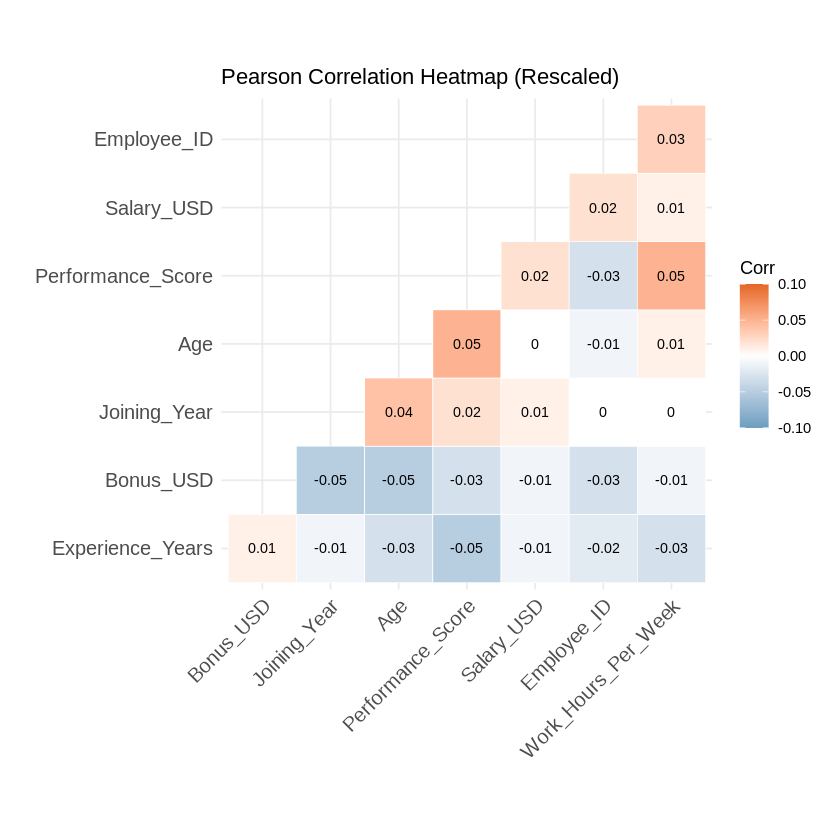

In [6]:
# Load library yang dibutuhkan
if (!require(ggcorrplot)) {
  install.packages("ggcorrplot")
  library(ggcorrplot)
}
library(ggcorrplot)
library(ggplot2)

# Pastikan matriks korelasi sudah ada (dari langkah sebelumnya)
# numeric_df <- salary_df[sapply(salary_df, is.numeric)]
# corr_matrix <- cor(numeric_df, method = "pearson", use = "complete.obs")

# Membuat Plot dengan Skala yang Disesuaikan
ggcorrplot(corr_matrix,
           hc.order = TRUE,
           type = "lower",
           lab = TRUE,
           lab_size = 3,
           title = "Pearson Correlation Heatmap (Rescaled)",
           outline.color = "white",
           ggtheme = ggplot2::theme_minimal()) +
  # --- BAGIAN INI YANG MEMAKSA WARNA MUNCUL ---
  # Kita ubah limit dari c(-1, 1) menjadi c(-0.1, 0.1)
  # Artinya: Angka 0.1 sudah dianggap "Sangat Oranye"
  scale_fill_gradient2(low = "#6D9EC1", mid = "white", high = "#E46726",
                       midpoint = 0, limit = c(-0.1, 0.1), name = "Corr")

# REVISI UJI HIPOTESIS

In [7]:
# ==============================================================================
# PERSIAPAN DATA
# ==============================================================================

salary_df$Education <- as.factor(salary_df$Education)
salary_df$Country <- as.factor(salary_df$Country)
salary_df$Gender <- as.factor(salary_df$Gender)

# --- KHUSUS UNTUK METODE TOPIC 11 (CHI-SQUARE) ---
# Karena Chi-Square butuh data kategorik, kita kelompokkan Gaji menjadi 2:
# "Above Average" (Di atas rata-rata) dan "Below Average" (Di bawah rata-rata)
mean_salary <- mean(salary_df$Salary_USD)
salary_df$Salary_Category <- ifelse(salary_df$Salary_USD >= mean_salary, "High Salary", "Low Salary")
salary_df$Salary_Category <- as.factor(salary_df$Salary_Category)

cat("Rata-rata Gaji Global:", mean_salary, "\n\n")


cat("---------------------------------------")

Rata-rata Gaji Global: 89792.31 

---------------------------------------

## HIPOTESIS 1 | Pengaruh Pengalaman Kerja Terhadap Tingkat Gaji (Topic 9: Linear Regression & Correlation)

=== H1: Pengalaman vs Gaji (Metode: Pearson Correlation & Regression) ===

	Pearson's product-moment correlation

data:  salary_df$Experience_Years and salary_df$Salary_USD
t = -0.2003, df = 1198, p-value = 0.8413
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06235601  0.05081945
sample estimates:
         cor 
-0.005786815 


Call:
lm(formula = Salary_USD ~ Experience_Years, data = salary_df)

Residuals:
   Min     1Q Median     3Q    Max 
-59655 -31063   -683  31350  60320 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      90130.29    1971.77   45.71   <2e-16 ***
Experience_Years   -23.55     117.56   -0.20    0.841    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35340 on 1198 degrees of freedom
Multiple R-squared:  3.349e-05,	Adjusted R-squared:  -0.0008012 
F-statistic: 0.04012 on 1 and 1198 DF,  p-value: 0.8413

>> Kesimpulan H1: TIDAK ada hubun

`geom_smooth()` using formula = 'y ~ x'


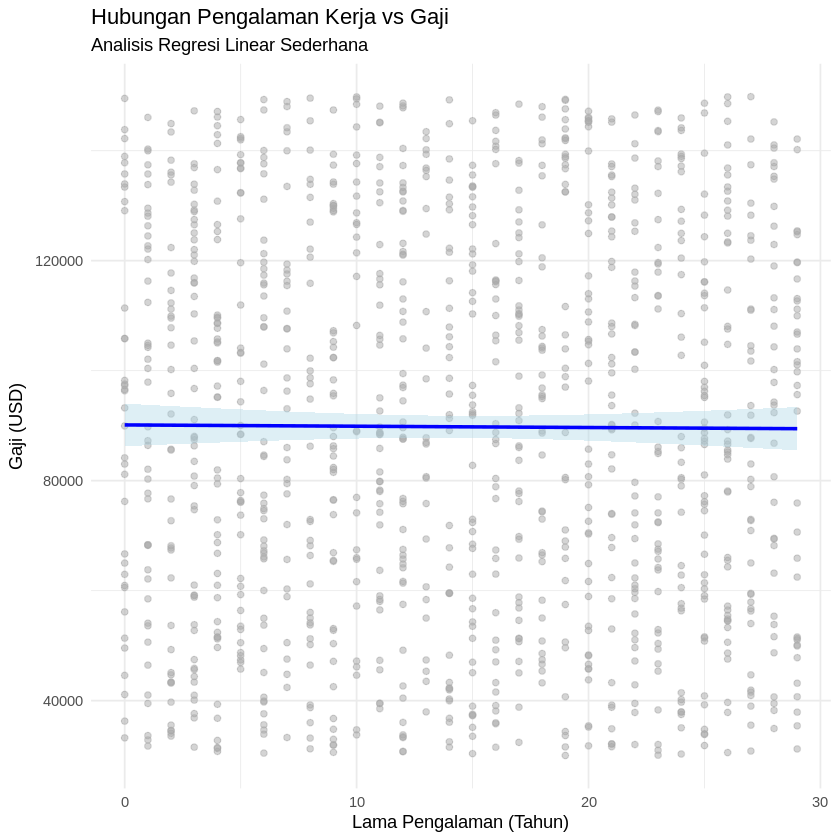

In [35]:
# ==============================================================================
# 1. HIPOTESIS 1: PENGARUH PENGALAMAN (Topic 9: Linear Regression & Correlation)
# ==============================================================================
cat("=== H1: Pengalaman vs Gaji (Metode: Pearson Correlation & Regression) ===\n")

# A. Uji Korelasi Pearson
cor_test <- cor.test(salary_df$Experience_Years, salary_df$Salary_USD, method = "pearson")
print(cor_test)

# B. Simple Linear Regression (Y = a + bX)
model_regresi <- lm(Salary_USD ~ Experience_Years, data = salary_df)
print(summary(model_regresi))

# Interpretasi H1
if(cor_test$p.value < 0.05) {
  cat(">> Kesimpulan H1: Ada hubungan signifikan (Tolak H0).\n")
} else {
  cat(">> Kesimpulan H1: TIDAK ada hubungan signifikan (Terima H0).\n")
}
cat("\n---------------------------------------------------------------\n")

# ==============================================================================
  # --- VISUALISASI H1: Scatter Plot dengan Garis Regresi ---

ggplot(salary_df, aes(x = Experience_Years, y = Salary_USD)) +
  geom_point(alpha = 0.5, color = "darkgrey") +  # Titik data (transparan)
  geom_smooth(method = "lm", color = "blue", fill = "lightblue") + # Garis Regresi Linear
  labs(
    title = "Hubungan Pengalaman Kerja vs Gaji",
    subtitle = "Analisis Regresi Linear Sederhana",
    x = "Lama Pengalaman (Tahun)",
    y = "Gaji (USD)"
  ) +
  theme_minimal()


## HIPOTESIS 2 | Pengaruh Tingkat Pendidikan Terhadap Struktur Gaji ( Topic 11: Chi-Square Test )

=== H2: Pendidikan vs Gaji (Cek Asosiasi & Arah) ===
             
              High Salary Low Salary
  High School         145        132
  Bachelor            146        147
  Master              145        164
  PhD                 155        166

	Pearson's Chi-squared test

data:  tabel_edu
X-squared = 1.8892, df = 3, p-value = 0.5957


Persentase Karyawan Gaji Tinggi per Pendidikan:
High School    Bachelor      Master         PhD 
   52.34657    49.82935    46.92557    48.28660 

[HASIL] H0 Diterima (Tidak Signifikan).
Kesimpulan: Tingkat pendidikan TIDAK mempengaruhi besaran gaji.
-----------------------

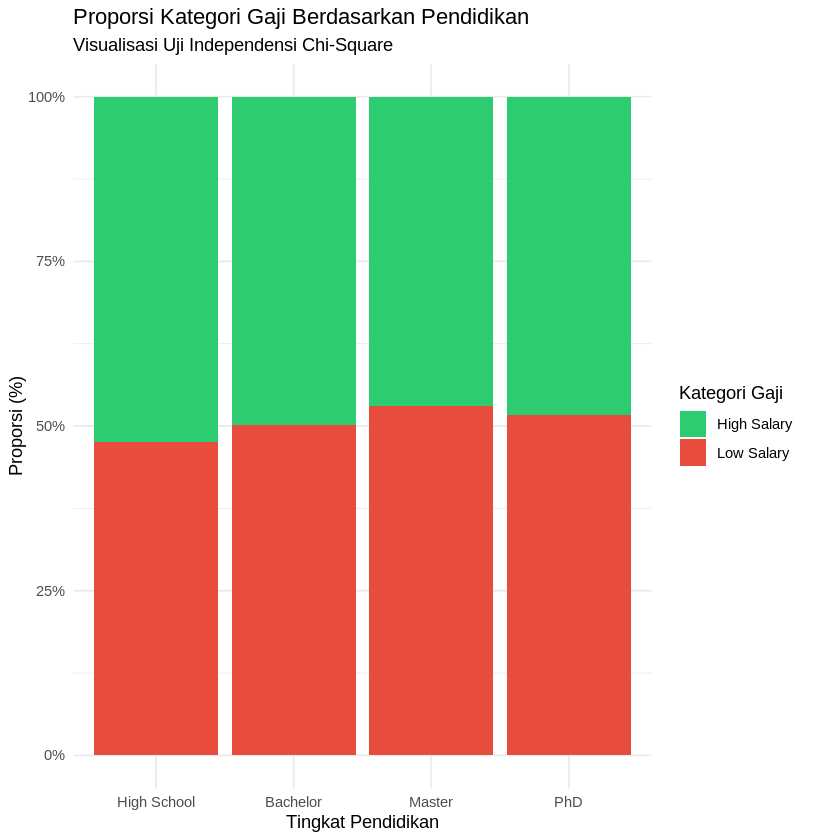

In [20]:
cat("=== H2: Pendidikan vs Gaji (Cek Asosiasi & Arah) ===\n")

# 1. Tabel Kontingensi
tabel_edu <- table(salary_df$Education, salary_df$Salary_Category)
print(tabel_edu)

# 2. Uji Chi-Square
uji_h2 <- chisq.test(tabel_edu)
print(uji_h2)

# 3. Cek Proporsi (Untuk melihat arahnya)
# Kita hitung persentase orang bergaji "High Salary" di tiap pendidikan
proporsi <- prop.table(tabel_edu, 1) * 100
cat("\nPersentase Karyawan Gaji Tinggi per Pendidikan:\n")
print(proporsi[, "High Salary"])

# Logika Kesimpulan
if(uji_h2$p.value < 0.05) {
  cat("\n[HASIL] H0 Ditolak (Signifikan).\n")
  cat("Kesimpulan: Tingkat pendidikan mempengaruhi peluang gaji.\n")
  cat("(Cek manual persentase di atas: Apakah PhD/Master persentasenya paling tinggi?)")
} else {
  cat("\n[HASIL] H0 Diterima (Tidak Signifikan).\n")
  cat("Kesimpulan: Tingkat pendidikan TIDAK mempengaruhi besaran gaji.\n")
}

cat("-----------------------")
# --- VISUALISASI H2: Proporsi Gaji Tinggi per Pendidikan ---

# Mengurutkan jenjang pendidikan agar rapi
salary_df$Education <- factor(salary_df$Education, levels = c("High School", "Bachelor", "Master", "PhD"))

ggplot(salary_df, aes(x = Education, fill = Salary_Category)) +
  geom_bar(position = "fill") + # "fill" membuat grafik jadi persentase (0-100%)
  scale_y_continuous(labels = scales::percent) + # Ubah sumbu Y jadi persen
  scale_fill_manual(values = c("High Salary" = "#2ecc71", "Low Salary" = "#e74c3c")) +
  labs(
    title = "Proporsi Kategori Gaji Berdasarkan Pendidikan",
    subtitle = "Visualisasi Uji Independensi Chi-Square",
    x = "Tingkat Pendidikan",
    y = "Proporsi (%)",
    fill = "Kategori Gaji"
  ) +
  theme_minimal()

## HIPOTESIS 3 | PENGARUH GENDER (Topic 8: Independent T-Test)


=== H3: Gender vs Gaji (Metode: Independent Sample T-Test) ===

	Welch Two Sample t-test

data:  Salary_USD by Gender
t = -1.1261, df = 1195.4, p-value = 0.2603
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -6298.662  1704.832
sample estimates:
mean in group Female   mean in group Male 
            88636.19             90933.11 

>> Kesimpulan H3: Tidak ada perbedaan gaji signifikan antar gender (Terima H0).

---------------------------------------------------------------


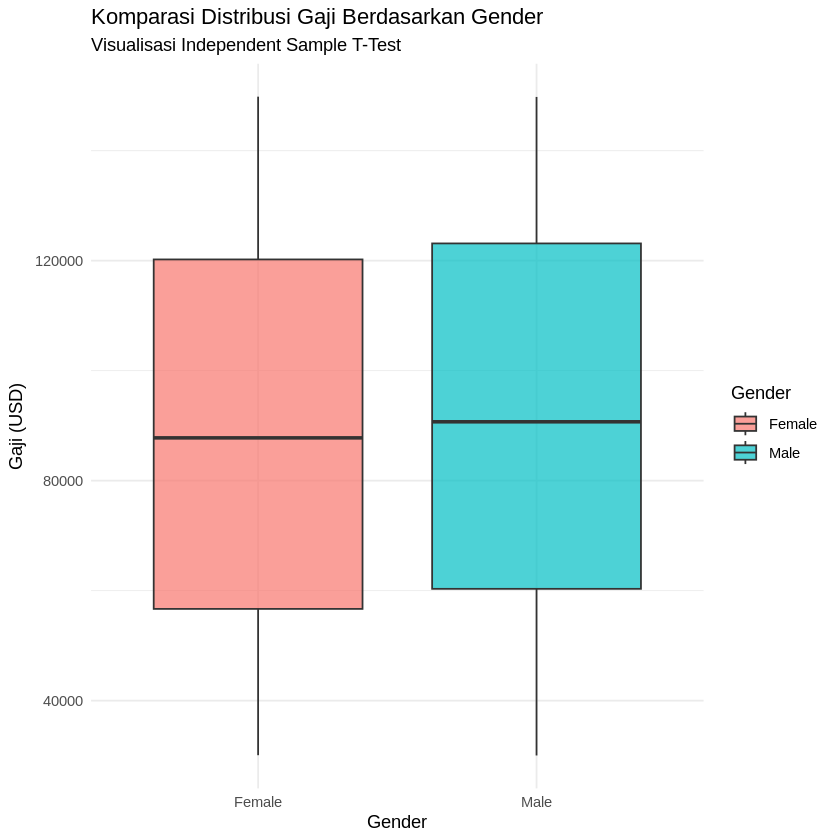

In [36]:
# ==============================================================================
# 3. HIPOTESIS 3: PENGARUH GENDER (Topic 8: Independent T-Test)
# ==============================================================================
cat("\n=== H3: Gender vs Gaji (Metode: Independent Sample T-Test) ===\n")

# Uji T Independen (Asumsi varians tidak sama / Welch Test)
t_test_gender <- t.test(Salary_USD ~ Gender, data = salary_df, var.equal = FALSE)
print(t_test_gender)

# Interpretasi H3
if(t_test_gender$p.value < 0.05) {
  cat(">> Kesimpulan H3: Rata-rata gaji Laki-laki dan Perempuan berbeda signifikan (Tolak H0).\n")
} else {
  cat(">> Kesimpulan H3: Tidak ada perbedaan gaji signifikan antar gender (Terima H0).\n")
}
cat("\n---------------------------------------------------------------\n")
# --- VISUALISASI H3: Distribusi Gaji male vs female ---

ggplot(salary_df, aes(x = Gender, y = Salary_USD, fill = Gender)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Komparasi Distribusi Gaji Berdasarkan Gender",
    subtitle = "Visualisasi Independent Sample T-Test",
    x = "Gender",
    y = "Gaji (USD)"
  ) +
  theme_minimal()

## HIPOTESIS 4 |PENGARUH NEGARA (Topic 11: Chi-Square Test)



=== H4: Negara vs Kategori Gaji (Metode: Chi-Square Test of Independence) ===
          
           High Salary Low Salary
  Canada           123        111
  India            131        135
  Pakistan         120        127
  UK               101        115
  USA              116        121

	Pearson's Chi-squared test

data:  table_country
X-squared = 1.6172, df = 4, p-value = 0.8057

>> Kesimpulan H4: Negara dan Tingkat Gaji saling bebas/tidak berhubungan (Terima H0).
Kesimpulan: Tidak peduli di negara mana, standar gajinya sama saja.
--------------------------------------------------------

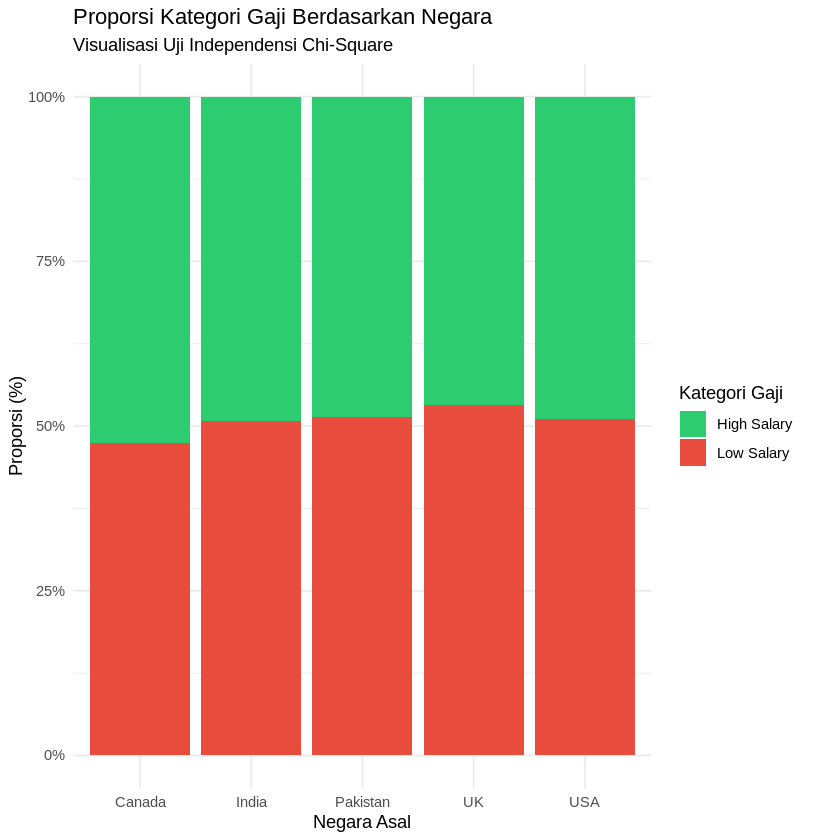

In [26]:
# ==============================================================================
# 4. HIPOTESIS 4: PENGARUH NEGARA (Topic 11: Chi-Square Test )
# Menggantikan ANOVA karena kategori > 2
# ==============================================================================
cat("\n=== H4: Negara vs Kategori Gaji (Metode: Chi-Square Test of Independence) ===\n")

# Membuat Tabel Kontingensi (Country vs Salary_Category)
table_country <- table(salary_df$Country, salary_df$Salary_Category)
print(table_country)

# Uji Chi-Square
chi_country <- chisq.test(table_country)
print(chi_country)

# Interpretasi H4
if(chi_country$p.value < 0.05) {
  cat(">> Kesimpulan H4: Ada asosiasi signifikan antara Negara dan Tingkat Gaji (Tolak H0).\n")
  cat("Kesimpulan: Negara tempat kerja mempengaruhi besaran gaji.\n")
} else {
  cat(">> Kesimpulan H4: Negara dan Tingkat Gaji saling bebas/tidak berhubungan (Terima H0).\n")
  cat("Kesimpulan: Tidak peduli di negara mana, standar gajinya sama saja.\n")
}

cat("--------------------------------------------------------")
# --- VISUALISASI H4: Proporsi Gaji Tinggi per Negara ---

ggplot(salary_df, aes(x = Country, fill = Salary_Category)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_manual(values = c("High Salary" = "#2ecc71", "Low Salary" = "#e74c3c")) +
  labs(
    title = "Proporsi Kategori Gaji Berdasarkan Negara",
    subtitle = "Visualisasi Uji Independensi Chi-Square",
    x = "Negara Asal",
    y = "Proporsi (%)",
    fill = "Kategori Gaji"
  ) +
  theme_minimal()

# JAWAB TUJUAN PENELITIAN


## TUJUAN 1 Analisis Hubungan: Pengalaman Kerja vs Gaji


	Pearson's product-moment correlation

data:  salary_df$Experience_Years and salary_df$Salary_USD
t = -0.2003, df = 1198, p-value = 0.8413
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06235601  0.05081945
sample estimates:
         cor 
-0.005786815 




Call:
lm(formula = Salary_USD ~ Experience_Years, data = salary_df)

Residuals:
   Min     1Q Median     3Q    Max 
-59655 -31063   -683  31350  60320 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      90130.29    1971.77   45.71   <2e-16 ***
Experience_Years   -23.55     117.56   -0.20    0.841    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35340 on 1198 degrees of freedom
Multiple R-squared:  3.349e-05,	Adjusted R-squared:  -0.0008012 
F-statistic: 0.04012 on 1 and 1198 DF,  p-value: 0.8413


`geom_smooth()` using formula = 'y ~ x'


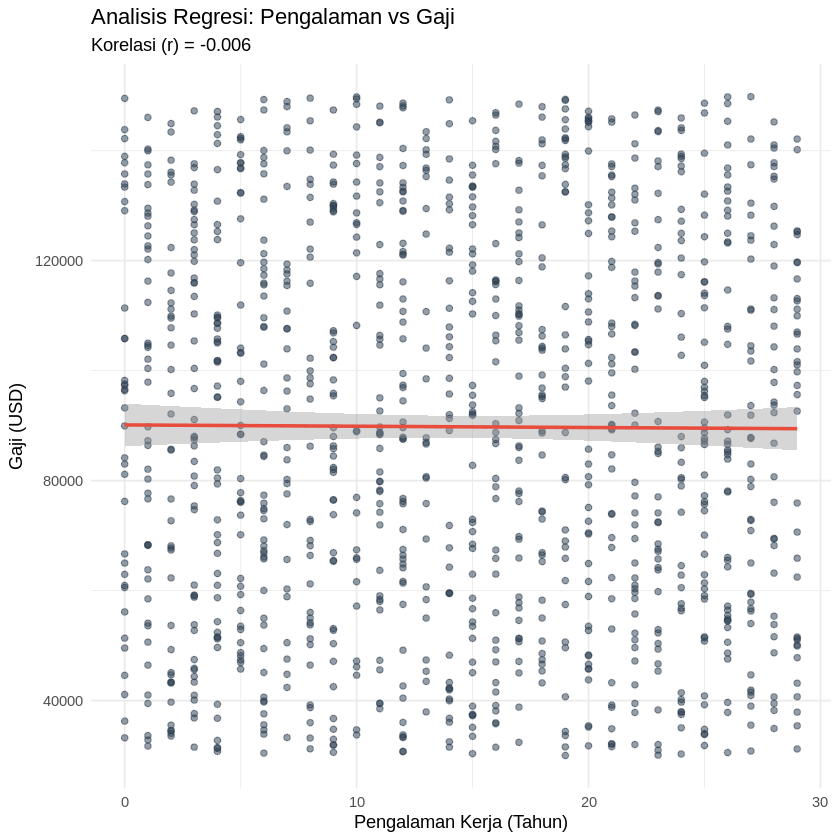

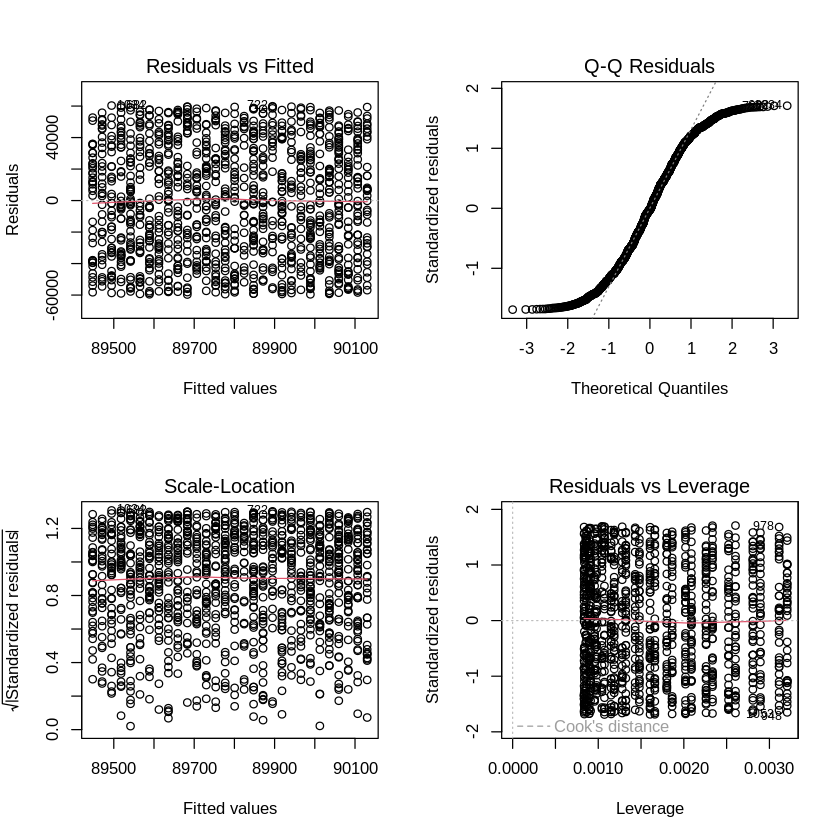

In [12]:
# --- HIPOTESIS 1. Simple Linear Regression & Pearson Correlation ---

# 1. Uji Korelasi Pearson
cor_test <- cor.test(salary_df$Experience_Years, salary_df$Salary_USD, method = "pearson")
print(cor_test)

# 2. Model Regresi Linear
# Model: Gaji = beta0 + beta1 * Pengalaman
model_reg <- lm(Salary_USD ~ Experience_Years, data = salary_df)
summary(model_reg)

# 3. Visualisasi Scatterplot dengan Garis Regresi
plot_reg <- ggplot(salary_df, aes(x = Experience_Years, y = Salary_USD)) +
  geom_point(alpha = 0.5, color = "#2c3e50") +
  geom_smooth(method = "lm", color = "#e74c3c", se = TRUE) +
  labs(title = "Analisis Regresi: Pengalaman vs Gaji",
       subtitle = paste("Korelasi (r) =", round(cor_test$estimate, 3)),
       x = "Pengalaman Kerja (Tahun)",
       y = "Gaji (USD)") +
  theme_minimal()

print(plot_reg)

# 4. Analisis Residual (Opsional tapi bagus untuk validitas model)
par(mfrow = c(2, 2))
plot(model_reg)
par(mfrow = c(1, 1)) # Reset layout



## TUJUAN 2 Analisis Komparatif: Gender Pay Gap
Menguji apakah ada perbedaan gaji yang signifikan antara Laki-laki dan Perempuan.


	Welch Two Sample t-test

data:  Salary_USD by Gender
t = -1.1261, df = 1195.4, p-value = 0.2603
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -6298.662  1704.832
sample estimates:
mean in group Female   mean in group Male 
            88636.19             90933.11 



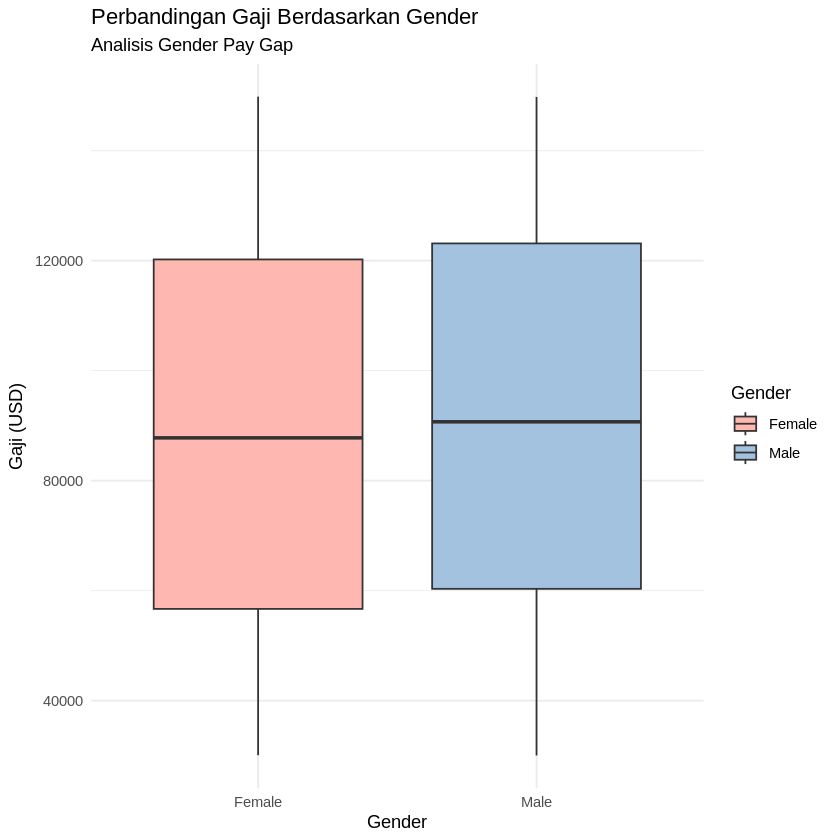

In [14]:
# --- C.2. Uji Beda Dua Rata-rata (Gender) ---
# --- HIPOTESIS 3 ---

# Opsi 1: Independent t-Test (Jika data Normal)
t_test_gender <- t.test(Salary_USD ~ Gender, data = salary_df, var.equal = FALSE)
print(t_test_gender)

# Opsi 2: Mann-Whitney U Test (Jika data TIDAK Normal)
# wilcox_gender <- wilcox.test(Salary_USD ~ Gender, data = salary_df)
# print(wilcox_gender)

# Visualisasi Boxplot Gender
plot_gender <- ggplot(salary_df, aes(x = Gender, y = Salary_USD, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Perbandingan Gaji Berdasarkan Gender",
       subtitle = "Analisis Gender Pay Gap",
       x = "Gender",
       y = "Gaji (USD)") +
  theme_minimal() +
  scale_fill_manual(values = c("#ffb7b2", "#a2c2e0"))

print(plot_gender)




## TUJUAN 3 Analisis Komparatif: Tingkat Pendidikan
Membandingkan gaji antar jenjang pendidikan


	Kruskal-Wallis rank sum test

data:  Salary_USD by Education
Kruskal-Wallis chi-squared = 3.73, df = 3, p-value = 0.2921



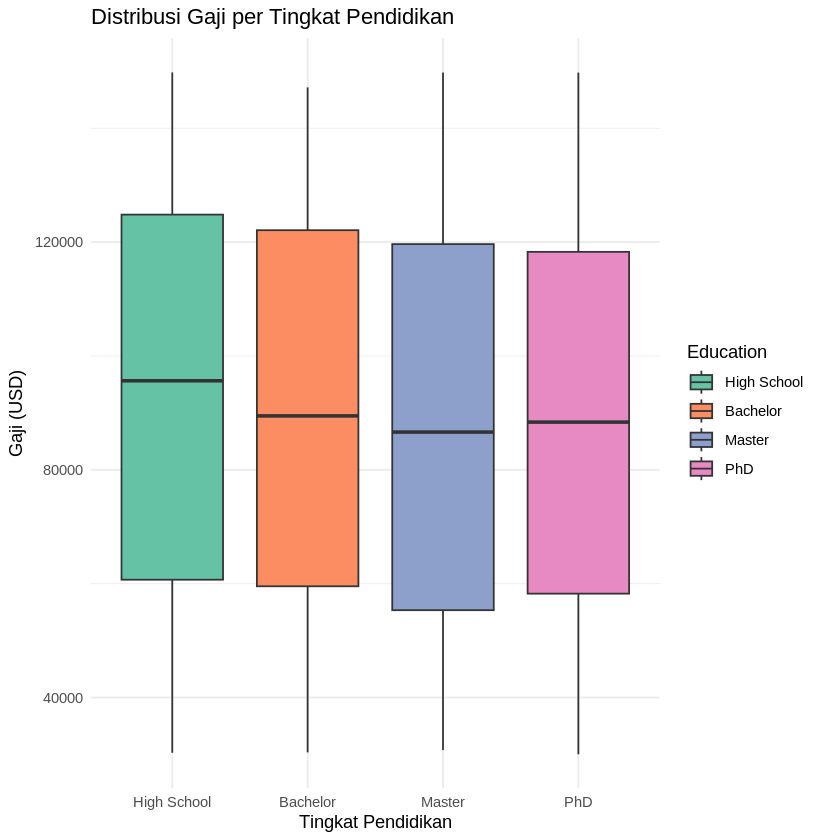

In [27]:
# --- C.3. Uji Beda Rata-rata (Pendidikan) ---

# Opsi 2: Kruskal-Wallis Test (Non-Parametrik)
kruskal_edu <- kruskal.test(Salary_USD ~ Education, data = salary_df)
print(kruskal_edu)

# Visualisasi Boxplot Pendidikan
plot_edu <- ggplot(salary_df, aes(x = Education, y = Salary_USD, fill = Education)) +
  geom_boxplot() +
  labs(title = "Distribusi Gaji per Tingkat Pendidikan",
       x = "Tingkat Pendidikan",
       y = "Gaji (USD)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

print(plot_edu)

## TUJUAN 4 Analisis Komparatif: Lokasi Geografis (Negara)
Melihat apakah negara mempengaruhi besaran gaji.


## TUJUAN 5 Analisis Asosiasi: Gender vs Departemen
Menguji independensi antara gender dan pemilihan departemen.


           
            Female Male
  Finance      145  138
  HR           167  161
  IT           140  163
  Marketing    144  142

	Pearson's Chi-squared test

data:  table_dept_gender
X-squared = 1.9895, df = 3, p-value = 0.5746



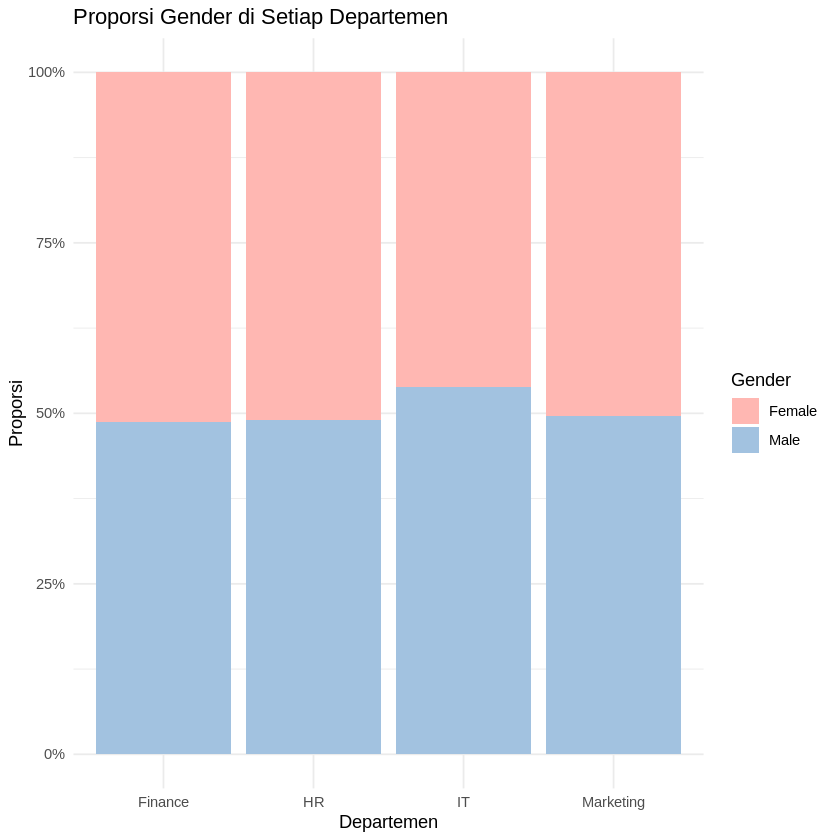

In [29]:
# --- C.5. Chi-Square Test of Independence ---

# Membuat Tabel Kontingensi
table_dept_gender <- table(salary_df$Department, salary_df$Gender)
print(table_dept_gender)

# Melakukan Chi-Square Test
chisq_res <- chisq.test(table_dept_gender)
print(chisq_res)

# Visualisasi Stacked Bar Chart
plot_assoc <- ggplot(salary_df, aes(x = Department, fill = Gender)) +
  geom_bar(position = "fill") +
  labs(title = "Proporsi Gender di Setiap Departemen",
       x = "Departemen",
       y = "Proporsi",
       fill = "Gender") +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal() +
  scale_fill_manual(values = c("#ffb7b2", "#a2c2e0"))

print(plot_assoc)



## ESTIMASI PARAMETER
Menghitung estimasi rata-rata gaji populasi

In [28]:
# --- D. Confidence Interval ---

# Menghitung CI 95% untuk Mean Gaji
t_test_ci <- t.test(salary_df$Salary_USD, conf.level = 0.95)

cat("=== 95% Confidence Interval untuk Rata-rata Gaji ===\n")
cat("Lower Bound :", t_test_ci$conf.int[1], "\n")
cat("Upper Bound :", t_test_ci$conf.int[2], "\n")
cat("Mean Sample :", t_test_ci$estimate, "\n")

=== 95% Confidence Interval untuk Rata-rata Gaji ===
Lower Bound : 87791.71 
Upper Bound : 91792.91 
Mean Sample : 89792.31 
